<a href="https://colab.research.google.com/github/Deniscs873/kaggle_titanic_machinelearning/blob/main/Titanic_%3E_Machine_learning_%3E_Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Instalação das Bibliotecas necessárias no COLAB



In [268]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [269]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [270]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [271]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [272]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



# **Titanic Data Science Solutions**

Este caderno é um complemento para o livro Data Science Solutions.
O caderno nos orienta através de um fluxo de trabalho típico para resolver competições de ciência de dados em sites como o Kaggle.

Existem vários excelentes cadernos para estudar entradas de competição de ciência de dados. No entanto, muitos ignorarão algumas das explicações sobre como a solução é desenvolvida, pois esses cadernos são desenvolvidos por especialistas para especialistas. 

O objetivo deste caderno é seguir um fluxo de trabalho passo a passo, explicando cada etapa e justificativa para cada decisão que tomamos durante o desenvolvimento da solução.

# Flux de trabalho para solução

O fluxo de trabalho da solução de concorrência passa por sete estágios descritos no livro Data Science Solutions.

Definição de pergunta ou problema.

1.   Definição de pergunta ou problema.
2.   Adquira dados de treinamento e teste.
3.   Esboçar, preparar, limpar os dados.
4.   Analise, identifique padrões e explore os dados.
5.   Modele, preveja e resolva o problema.
6.   Visualize, relate e apresente as etapas de solução de problemas e a solução final.
7.   Fornecer ou enviar os resultados.

O fluxo de trabalho indica a sequência geral de como cada estágio pode seguir o outro. No entanto, existem casos de uso com exceções.

Podemos combinar vários estágios de fluxo de trabalho. Podemos analisar visualizando dados.
Execute um estágio antes do indicado. Podemos analisar os dados antes e depois da disputa.
Execute um estágio várias vezes em nosso fluxo de trabalho. Visualize o estágio pode ser usado várias vezes.
Solte um estágio completamente. Podemos não precisar de estágio de fornecimento para produzir ou fornecer serviços para habilitar nosso conjunto de dados para uma competição.


In [273]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

Carregar arquivo de treino

In [274]:
from google.colab import files
import warnings # na versão atual existem vários warnins. vamos ignorar
warnings.filterwarnings("ignore")

import io
uploaded = files.upload() # uploaded é um dicionário, sendo a chave o nome do arquivo

# Loading dataset
# https://www.kaggle.com/datasets/uciml/iris - Basta fazer p download do arquivo CSV e carregar nesse código.

train_df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

#table = ff.create_table(train_df.head())

Saving train.csv to train (6).csv


Carregar arquivo de teste

In [275]:
from google.colab import files
import warnings # na versão atual existem vários warnins. vamos ignorar
warnings.filterwarnings("ignore")

import io
uploaded = files.upload() # uploaded é um dicionário, sendo a chave o nome do arquivo

# Loading dataset
# https://www.kaggle.com/datasets/uciml/iris - Basta fazer p download do arquivo CSV e carregar nesse código.

test_df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

#table = ff.create_table(test_df.head())

Saving test.csv to test (5).csv


In [276]:
combine = [train_df, test_df]
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [277]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [278]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Qual é a distribuição dos valores numéricos de feição entre as amostras?

Isso nos ajuda a determinar, entre outros insights iniciais, quão representativo é o conjunto de dados de treinamento do domínio do problema real.

*	O total de amostras é de 891 ou 40% do número real de passageiros a bordo do Titanic (2.224). 
*	Sobreviveu é uma característica categórica com 0 ou 1 valores.
*	Cerca de 38% das amostras sobreviveram representativas da taxa de sobrevivência real em 32%.
*	A maioria dos passageiros (> 75%) não viajou com pais ou filhos.
*	Quase 30% dos passageiros tinham irmãos e/ou cônjuge a bordo.
*	As tarifas variaram significativamente, com poucos passageiros (<1%) pagando até US $ 512.
*	Poucos passageiros idosos (<1%) na faixa etária de 65 a 80 anos.


In [279]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [280]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Qual é a distribuição de características categóricas? 
* Os nomes são únicos em todo o conjunto de dados (count=unique=891)
* Variável sexo como dois valores possíveis com 65% masculino (top=masculino, freq=577/count=891)
* Os valores da cabine têm vários dupicates entre as amostras.
* Alternativamente, vários passageiros compartilharam uma cabine. Embarked leva três valores possíveis.
* Porto S foi o recurso usado pela maioria dos passageiros (top=S).
* Ticket tem alta proporção (22%) de valores duplicados (unique=681).


In [281]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Analisar por recursos de pivô
Para confirmar algumas de nossas observações e suposições, podemos analisar rapidamente nossas correlações de recursos girando os recursos uns contra os outros. Só o podemos fazer nesta fase para as características que não têm quaisquer valores vazios. Também faz sentido fazê-lo apenas para recursos categóricos (Sexo), ordinais (Pclass) ou discretos (SibSp, Parch). 
* Pclass Observamos correlação significativa (>0,5) entre Pclasse=1 e Sobreviveu (classificação #3). Decidimos incluir esse recurso em nosso modelo. 
* Sexo Confirmamos a observação durante a definição do problema de que Sexo=feminino apresentou taxa de sobrevida muito alta em 74% (classificação #1). 
* SibSp e Parch Essas características têm correlação zero para certos valores. Pode ser melhor derivar um recurso ou um conjunto de recursos desses recursos individuais (criando o número 1).


In [282]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [283]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [284]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [285]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Analise visualizando dados
Agora podemos continuar confirmando algumas de nossas suposições usando visualizações para analisar os dados. 
# Correlacionando características numéricas 
Vamos começar entendendo as correlações entre características numéricas e nosso objetivo de solução (Sobreviveu). Um gráfico de histograma é útil para analisar variáveis numéricas contínuas, como Idade, onde bandas ou intervalos ajudarão a identificar padrões úteis. O histograma pode indicar a distribuição de amostras usando compartimentos definidos automaticamente ou bandas igualmente variadas. Isso nos ajuda a responder a perguntas relacionadas a bandas específicas (Os bebês tiveram melhor taxa de sobrevivência?) Observe que o eixo x em visualizações de histórgrama representa a contagem de amostras ou passageiros. 
Observações. 
* Os lactentes (Idade <=4) apresentaram alta taxa de sobrevida.
* Os passageiros mais velhos (Idade = 80) sobreviveram.
* Grande número de jovens de 15 a 25 anos não sobreviveu.
* A maioria dos passageiros está na faixa etária de 15 a 35 anos. 
Decisões.
Essa análise simples confirma nossas suposições como decisões para os estágios subsequentes do fluxo de trabalho.
* Devemos considerar a Idade (nossa suposição classificando # 2) em nosso treinamento de modelo.
* Conclua o recurso Idade para valores nulos (completando #1).
* Devemos agrupar as faixas etárias (criando o número 3).


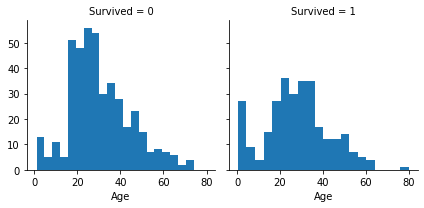

In [286]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [287]:
print('Percent of missing "Age" records is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Age" records is 19.87%


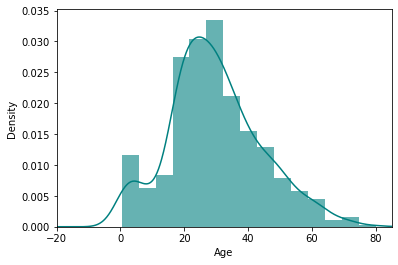

In [288]:
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-20,85)
plt.show()

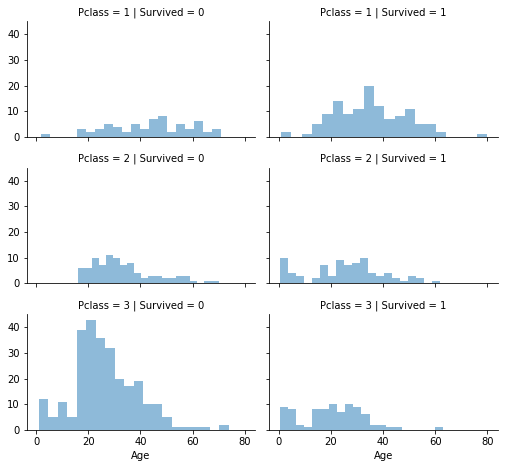

In [289]:
#grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

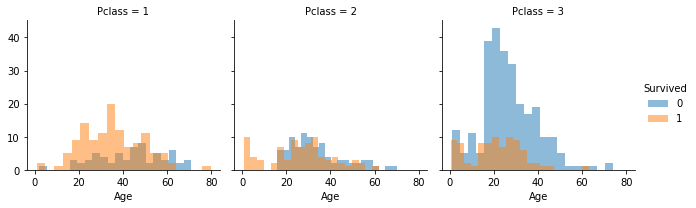

In [290]:
grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
# rid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

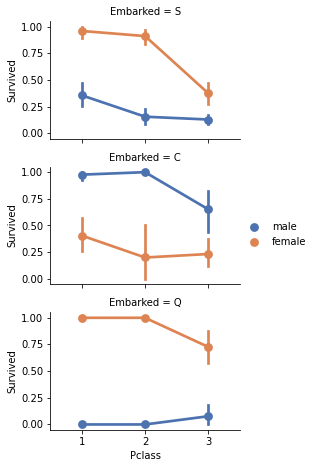

In [291]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

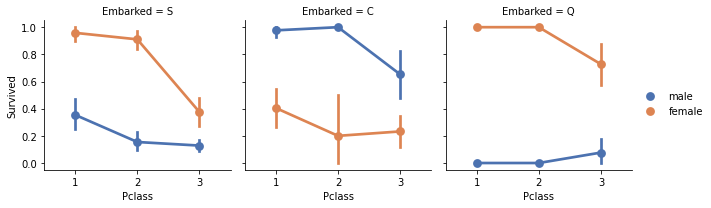

In [292]:
grid = sns.FacetGrid(train_df, col='Embarked')
# grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [293]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [294]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [295]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [296]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [297]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [298]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


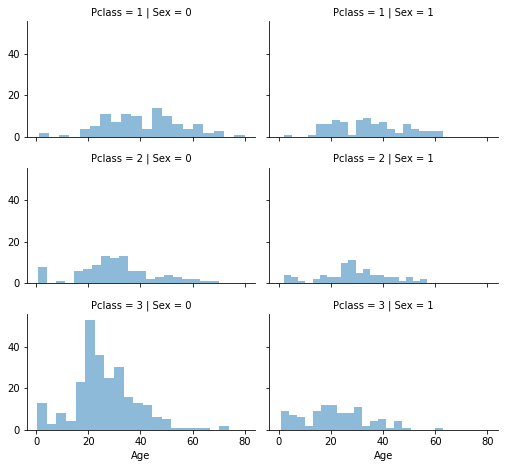

In [299]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [300]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [301]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [302]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [303]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [304]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [305]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [306]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [307]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [308]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [309]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [310]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [311]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [312]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [313]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


# Modelar, prever e resolver 
Agora estamos prontos para treinar um modelo e prever a solução necessária. Existem mais de 60 algoritmos de modelagem preditiva para escolher. Devemos entender o tipo de problema e o requisito de solução para restringir a alguns modelos selecionados que podemos avaliar. Nosso problema é um problema de classificação e regressão. Queremos identificar relação entre a saída (Sobreviveu ou não) com outras variáveis ou características (Sexo, Idade, Porto...). Também estamos realizando uma categoria de aprendizado de máquina que é chamada de aprendizado supervisionado, pois estamos treinando nosso modelo com um determinado conjunto de dados. Com esses dois critérios - Aprendizagem Supervisionada mais Classificação e Regressão, podemos restringir nossa escolha de modelos a alguns. Estes incluem: 
*Regressão Logística 
*KNN ou k-Vizinhos Mais Próximos 
*Suporte Máquinas Vetoriais 
* Naive Bayes classificador 
*Árvore de Decisão 
*Random Forrest 
*Perceptron 
*Rede neural artificial 
*RVM ou Máquina de Vetor de Relevância


In [314]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [315]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

In [316]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201619
5,Title,0.397888
2,Age,0.287011
4,Embarked,0.261473
6,IsAlone,0.126553
3,Fare,-0.086655
7,Age*Class,-0.311069
0,Pclass,-0.750700


In [317]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.23

In [318]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

In [319]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

In [320]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

In [321]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.12

In [322]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

77.22

In [323]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

In [324]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

<AxesSubplot:title={'center':'Correlação das características das pessoas'}>

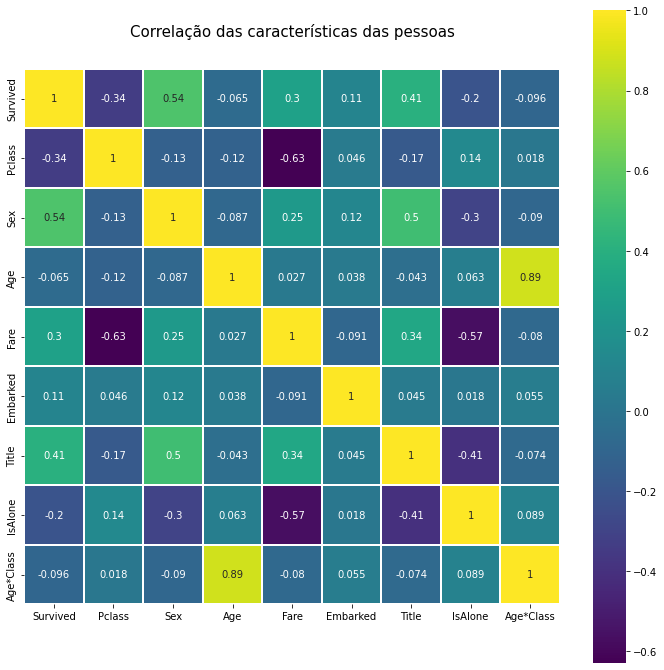

In [325]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlação das características das pessoas', y=1.05, size=15)
sns.heatmap(train_df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [326]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
2,Logistic Regression,80.36
7,Linear SVC,79.12
5,Perceptron,78.34
0,Support Vector Machines,78.23
6,Stochastic Gradient Decent,77.22
4,Naive Bayes,72.28


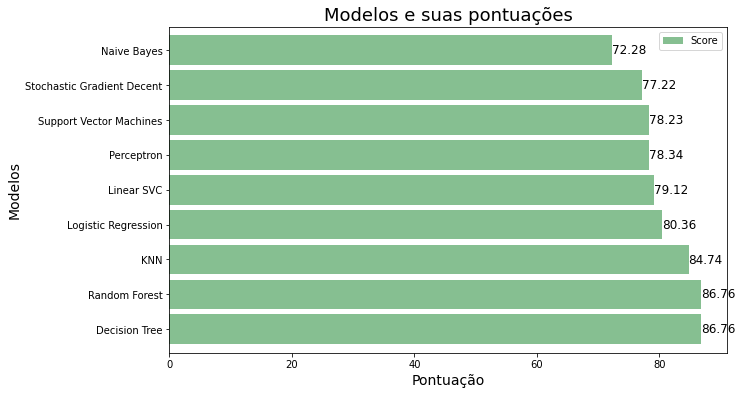

In [327]:
import pandas as pd
import matplotlib.pyplot as plt


# Define o índice do DataFrame como sendo a coluna 'Model'
models.set_index('Model', inplace=True)

# Ordena os valores em ordem crescente de pontuação
models.sort_values('Score', inplace=True)

# Plota um gráfico de barras horizontal
ax = models.plot(kind='barh', figsize=(10,6), color='#86bf91', zorder=2, width=0.85)

# Define o título do gráfico
ax.set_title('Modelos e suas pontuações', fontsize=18)

# Adiciona rótulos aos eixos X e Y
ax.set_xlabel('Pontuação', fontsize=14)
ax.set_ylabel('Modelos', fontsize=14)

# Inverte a ordem dos valores no eixo Y
ax.invert_yaxis()

# Remove as linhas de grade do gráfico
ax.grid(False, axis='y')

# Adiciona rótulos de valor em cada barra do gráfico
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=12)

# Exibe o gráfico
plt.show()

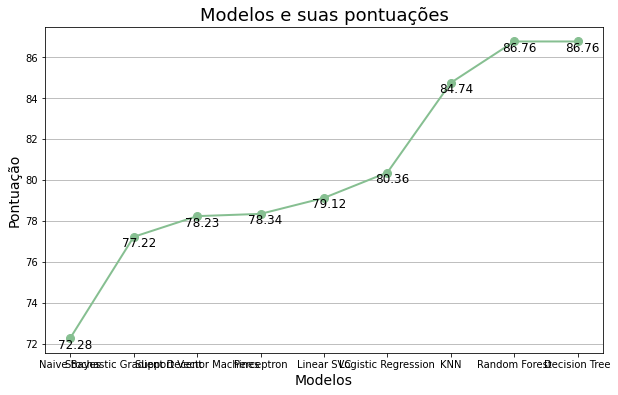

In [328]:
# Ordena os valores em ordem crescente de pontuação
models.sort_values('Score', inplace=True)

# Define as propriedades da figura e do eixo
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Modelos e suas pontuações', fontsize=18)
ax.set_xlabel('Modelos', fontsize=14)
ax.set_ylabel('Pontuação', fontsize=14)

# Plota a linha do gráfico
ax.plot(models.index, models['Score'], color='#86bf91', marker='o', linewidth=2, markersize=8)

# Adiciona os valores de pontuação como rótulos em cada ponto do gráfico
for x, y in zip(models.index, models['Score']):
    ax.annotate('{:.2f}'.format(y), xy=(x, y), xytext=(5, -10), textcoords='offset points', ha='center', fontsize=12)

# Remove as linhas de grade do gráfico
ax.grid(True, axis='y')

# Exibe o gráfico
plt.show()

# Importar Arquivo submission.csv

In [329]:
from google.colab import files
import warnings # na versão atual existem vários warnins. vamos ignorar
warnings.filterwarnings("ignore")

import io
uploaded = files.upload() # uploaded é um dicionário, sendo a chave o nome do arquivo

# Loading dataset
# https://www.kaggle.com/datasets/uciml/iris - Basta fazer p download do arquivo CSV e carregar nesse código.

submission_df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

#table = ff.create_table(submission_df.head())

Saving gender_submission.csv to gender_submission (4).csv


In [330]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
#submission(sumission_df, index=False)

# **Avaliação de Árvore de decisão**

In [331]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

cv = KFold(n_splits=10)            # Desired number of Cross Validation folds
accuracies = list()
max_attributes = len(list(test_df))
depth_range = range(1, max_attributes + 1)

# Testing max_depths from 1 to max attributes
# Uncomment prints for details about each Cross Validation pass
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(max_depth = depth)
    # print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(train_df):
        f_train = train_df.loc[train_fold] # Extract train data with cv indices
        f_valid = train_df.loc[valid_fold] # Extract valid data with cv indices

        model = tree_model.fit(X = f_train.drop(['Survived'], axis=1), 
                               y = f_train["Survived"]) # We fit the model with the fold train data
        valid_acc = model.score(X = f_valid.drop(['Survived'], axis=1), 
                                y = f_valid["Survived"])# We calculate accuracy with the fold validation data
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    # print("Accuracy per fold: ", fold_accuracy, "\n")
    # print("Average accuracy: ", avg)
    # print("\n")
    
# Just to show results conveniently
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.782285
         2          0.789076
         3          0.805843
         4          0.800250
         5          0.805880
         6          0.801436
         7          0.800262
         8          0.801436
         9          0.807029


In [332]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [333]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3


In [334]:
# remove a coluna "PassengerId" e armazena o resultado em um novo DataFrame
test_df_no_id = test_df.drop('PassengerId', axis=1)
test_df_no_id.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,2,0,2,1,1,6
1,3,1,2,0,0,3,0,6
2,2,0,3,1,2,1,1,6
3,3,0,1,1,0,1,1,3
4,3,1,1,1,0,3,0,3


In [335]:
import numpy as np
import pandas as pd
import re
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import graphviz 

PassengerId = test_df['PassengerId']
# Create Numpy arrays of train, test and target (Survived) dataframes to feed into our models
y_train = train_df['Survived']
x_train = train_df.drop(['Survived'], axis=1).values 
x_test = test_df_no_id.values

# Create Decision Tree with max_depth = 3
decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(x_train, y_train)

# Predicting results for test dataset
y_pred = decision_tree.predict(x_test)
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": y_pred
    })
submission.to_csv('submission.csv', index=False)

# Exporte nosso modelo treinado como um arquivo .dot
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = list(train_df.drop(['Survived'], axis=1)),
                              class_names = ['Morre', 'Sobrevive'],
                              rounded = True,
                              filled= True)
        
graph = graphviz.Source.from_file("tree1.dot")
graph.format = "png"
graph.render("tree1")

'tree1.png'

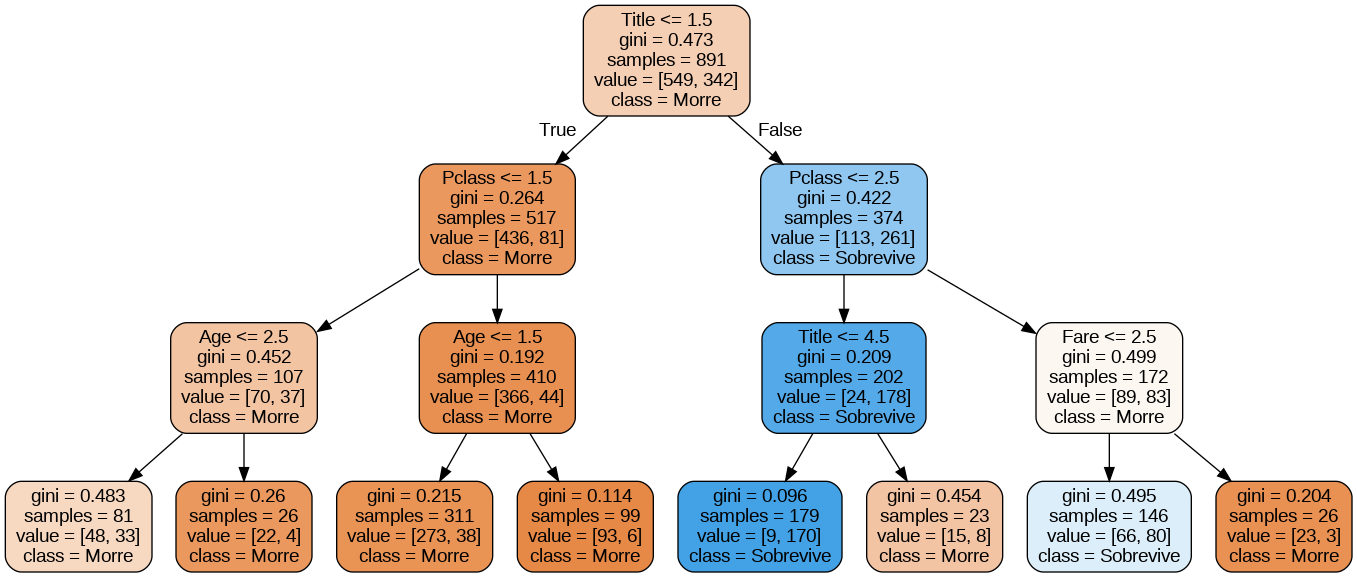

In [336]:
from IPython.display import Image
Image(filename='tree1.png')

# **Avaliação em Rede Neural**

In [337]:
#imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D,MaxPool2D

import keras

In [338]:
import tensorflow as tf
tf.keras.optimizers.Adam(
    learning_rate=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam', 
)
#creating a model with sequential columns
model = Sequential()

#flattens the data into a 1d array
model.add(Flatten())
#creates the first latyer with the input dimanetion. 

model.add(Dense(32, input_dim=train_df.shape[1],kernel_initializer = 'uniform', activation='relu'))
#next layer with 32 dense nodes
model.add(Dense(32, kernel_initializer = 'uniform', activation = 'relu'))
#drops 0.4 of the values from the next layer, so it does not over fit!

model.add(Dropout(0.4))
#last layer is initiated here
model.add(Dense(32,kernel_initializer = 'uniform', activation = 'relu'))

# create output layer
    # Feel free to experiment with the activation functions and the optimizers
model.add(Dense(1, activation='sigmoid'))  # output layer
    
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [339]:
history = model.fit(train_df, y_train, epochs=20, batch_size=50, validation_split = 0.2)

Epoch 1/20
15/15 [==============================] - 1s 16ms/step - loss: 0.6887 - accuracy: 0.6011 - val_loss: 0.6763 - val_accuracy: 0.6425
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 0.6694 - accuracy: 0.6096 - val_loss: 0.6414 - val_accuracy: 0.6425
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 0.6302 - accuracy: 0.6152 - val_loss: 0.5673 - val_accuracy: 0.6648
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 0.5782 - accuracy: 0.7289 - val_loss: 0.4734 - val_accuracy: 0.8883
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 0.4807 - accuracy: 0.8694 - val_loss: 0.3482 - val_accuracy: 0.9497
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 0.3617 - accuracy: 0.9171 - val_loss: 0.2336 - val_accuracy: 0.9665
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.2667 - accuracy: 0.9368 - val_loss: 0.1386 - val_accuracy: 0.9665
Epoch 8/20
15/15 [=

In [340]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 9)                 0         
                                                                 
 dense_12 (Dense)            (None, 32)                320       
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,465
Trainable params: 2,465
Non-traina

In [341]:
y_pred = model.predict(test_df)

y_final = (y_pred > 0.5).astype(int).reshape(test_df.shape[0])

output = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': y_final})
output.to_csv('prediction-ann.csv', index=False)

14/14 [==============================] - 0s 1ms/step


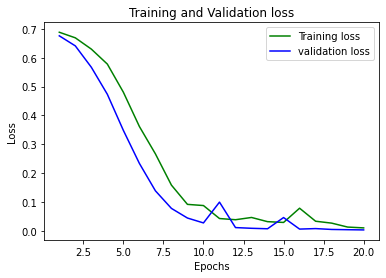

In [342]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

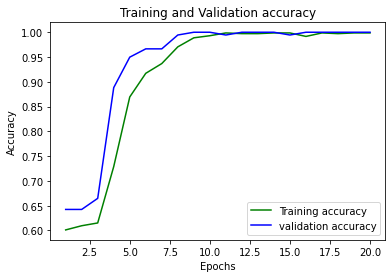

In [343]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()